In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import BallTree

In [36]:
# Generate 20 random 2D samples
X, _ = make_blobs(n_samples=200, n_features=2, centers=1, cluster_std=2, random_state=42)

In [37]:
# Construct BallTree
ball_tree = BallTree(X)

In [38]:
# Function to plot bounding boxes around the data points
def plot_bounding_boxes(X, ax):
    min_x, min_y = np.min(X, axis=0)
    max_x, max_y = np.max(X, axis=0)
    ax.add_patch(plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, linestyle='--', color='red'))


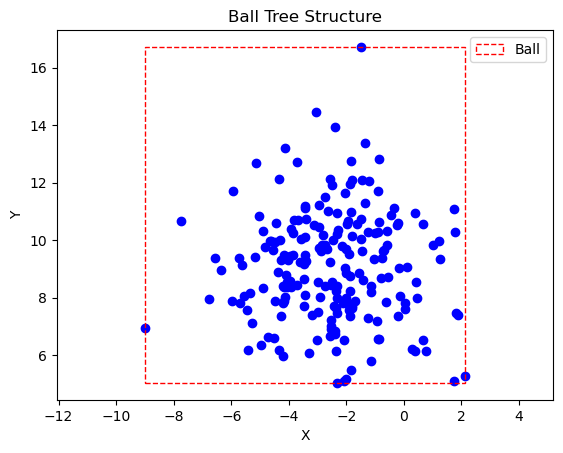

In [39]:
# Plot data points and bounding boxes
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Data')
plot_bounding_boxes(X, ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Ball Tree Structure')
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='red', fill=False, linestyle='--', label='Ball')])
ax.axis('equal')
plt.show()

In [40]:
# Function to recursively plot nodes of the BallTree
def plot_tree(ax, tree, idx, min_bounds, max_bounds):
    if idx < len(tree.idx_array) and tree.idx_array[idx] != -1:
        center = (min_bounds + max_bounds) / 2
        radius = np.linalg.norm(max_bounds - center)
        circle = plt.Circle(center, radius, color='red', fill=False, linestyle='--')
        ax.add_patch(circle)
        left_child_idx = 2 * idx + 1
        right_child_idx = 2 * idx + 2
        if left_child_idx < len(tree.idx_array) and tree.idx_array[left_child_idx] != -1:
            plot_tree(ax, tree, left_child_idx, min_bounds, center)
        if right_child_idx < len(tree.idx_array) and tree.idx_array[right_child_idx] != -1:
            plot_tree(ax, tree, right_child_idx, center, max_bounds)

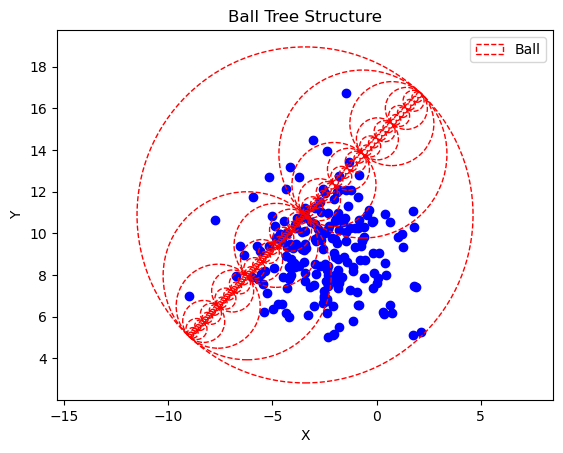

In [41]:
# Plot data points and balls (circles)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Data')
plot_tree(ax, ball_tree, 0, np.min(X, axis=0), np.max(X, axis=0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Ball Tree Structure')
ax.legend(handles=[plt.Circle((0, 0), 1, color='red', fill=False, linestyle='--', label='Ball')])
ax.axis('equal')
plt.show()

#### Implement KNN with Ball Tree settings

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score

In [43]:
# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size   = 0.2, 
                                                    random_state= 42)


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# Create KNeighborsClassifier with algorithm='kd_tree' and leaf_size=15
knn_classifier = KNeighborsClassifier(n_neighbors=5, 
                                      algorithm='ball_tree', 
                                      leaf_size=11)


In [55]:
# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=11)

In [56]:
# Perform prediction on the test data
y_pred = knn_classifier.predict(X_test)

D:\Anaconda-16-FEB\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193
